In [1]:
import numpy as np 
import pandas as pd

In [2]:
energy = pd.read_csv('./raw_data/Building_59/Bldg59_clean data/ele.csv')
energy['datetime'] = pd.to_datetime(energy['date'])
energy['date'] = energy['datetime'].dt.date
energy['total_energy'] = energy['mels_S']+energy['lig_S']+energy['mels_N']+energy['hvac_N']+energy['hvac_S']
energy = energy[['date','total_energy']]
energy = energy.groupby('date').sum()
energy.head()

,total_energy
date,
2018-01-01,6287.680033
2018-01-02,8042.225018
2018-01-03,7890.810021
2018-01-04,8114.895017
2018-01-05,7711.140000


In [3]:
energy.to_csv('daily_energy_consumption.csv', index=False)

<AxesSubplot:xlabel='date'>

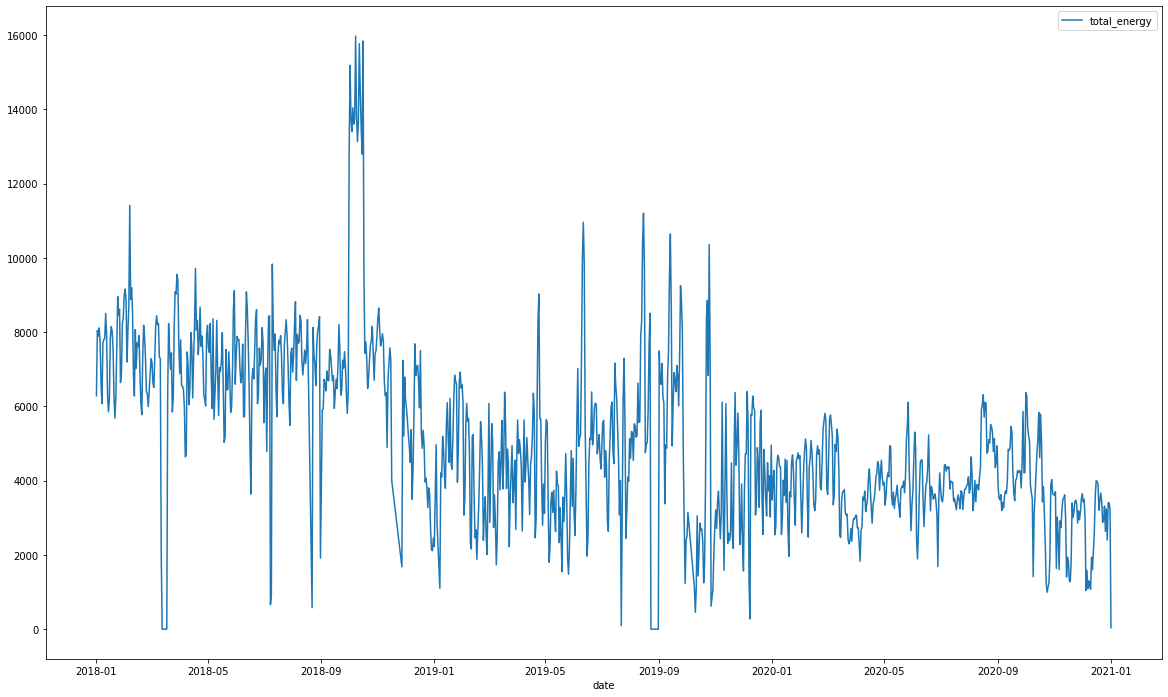

In [4]:
import matplotlib.pyplot as plt 

energy.plot(figsize=(20,12))

<AxesSubplot:ylabel='Count'>

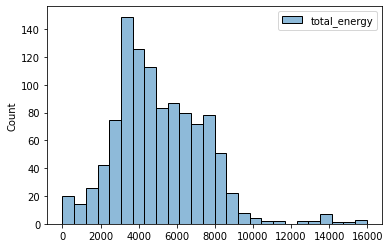

In [5]:
import seaborn as sns 
sns.histplot(data=energy)

In [6]:
weather = pd.read_csv('raw_data/Building_59/Bldg59_clean data/site_weather.csv')
weather['temperature'] = (weather['air_temp_set_1'] + weather['air_temp_set_2']) / 2
weather = weather.rename(columns={'relative_humidity_set_1':'humidity', 'solar_radiation_set_1':'sunnyness'})
weather = weather[['date','temperature','humidity','sunnyness']]
weather['date'] = pd.to_datetime(weather['date'])
weather.head()

,date,temperature,humidity,sunnyness
0,2018-01-01 00:00:00,11.575,79.07,86.70
1,2018-01-01 00:15:00,11.455,80.10,45.88
2,2018-01-01 00:30:00,11.550,79.92,51.62
3,2018-01-01 00:45:00,11.425,80.20,21.43
4,2018-01-01 01:00:00,11.135,81.50,6.45


In [7]:
hourly_weather = weather.copy()
hourly_weather['rounded_to_hour'] = hourly_weather['date'].dt.round('H')
hourly_weather = hourly_weather.groupby('rounded_to_hour')[['temperature','humidity','sunnyness']].mean().reset_index(drop=False)
hourly_weather.to_csv('hourly_weather.csv', index=False)
hourly_weather

,rounded_to_hour,temperature,humidity,sunnyness
0,2018-01-01 00:00:00,11.526667,79.696667,61.400000
1,2018-01-01 01:00:00,11.178333,81.300000,9.896667
2,2018-01-01 02:00:00,10.802000,82.860000,0.048000
3,2018-01-01 03:00:00,10.600000,84.466667,0.000000
4,2018-01-01 04:00:00,10.233000,86.520000,0.000000
...,...,...,...,...
26300,2020-12-31 20:00:00,11.541700,57.412000,452.560000
26301,2020-12-31 21:00:00,12.882500,52.703333,448.366667
26302,2020-12-31 22:00:00,13.881100,48.452000,393.800000
26303,2020-12-31 23:00:00,14.329667,48.060000,280.666667


In [8]:
daily_weather = weather.copy()
daily_weather['date'] = daily_weather['date'].dt.date
daily_weather.groupby('day').agg({
    'temperature':['mean','min','max'],
    'humidity':['mean','min','max'],
    'sunnyness':['mean','min','max'],
})
daily_weather

,date,temperature,humidity,sunnyness,day
0,2018-01-01 00:00:00,11.5750,79.07,86.70,2018-01-01
1,2018-01-01 00:15:00,11.4550,80.10,45.88,2018-01-01
2,2018-01-01 00:30:00,11.5500,79.92,51.62,2018-01-01
3,2018-01-01 00:45:00,11.4250,80.20,21.43,2018-01-01
4,2018-01-01 01:00:00,11.1350,81.50,6.45,2018-01-01
...,...,...,...,...,...
105212,2020-12-31 23:00:00,14.3140,49.13,267.90,2020-12-31
105213,2020-12-31 23:15:00,14.4445,47.89,254.20,2020-12-31
105214,2020-12-31 23:30:00,13.9330,50.00,199.90,2020-12-31
105215,2020-12-31 23:45:00,13.7610,51.61,188.80,2020-12-31


<AxesSubplot:xlabel='date'>

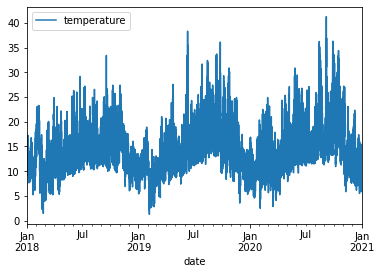

In [39]:
weather.plot(x='date', y='temperature')

In [40]:
occupancy = pd.read_csv('raw_data/Building_59/Bldg59_clean data/occ.csv')
occupancy['date'] = pd.to_datetime(occupancy['date'])
occupancy['date_rounded'] = occupancy['date'].dt.round('15min')
occupancy['time'] = occupancy['date'].dt.time
occupancy['occ'] = occupancy['occ_third_south'] + occupancy['occ_fourth_south']
occupancy

,date,occ_third_south,occ_fourth_south,date_rounded,time,occ
0,2018-05-22 07:00:00,0.0,0.0,2018-05-22 07:00:00,07:00:00,0.0
1,2018-05-22 07:01:00,0.0,1.0,2018-05-22 07:00:00,07:01:00,1.0
2,2018-05-22 07:02:00,0.0,0.0,2018-05-22 07:00:00,07:02:00,0.0
3,2018-05-22 07:03:00,0.0,1.0,2018-05-22 07:00:00,07:03:00,1.0
4,2018-05-22 07:04:00,0.0,0.0,2018-05-22 07:00:00,07:04:00,0.0
...,...,...,...,...,...,...
396188,2019-02-21 10:08:00,0.0,0.0,2019-02-21 10:15:00,10:08:00,0.0
396189,2019-02-21 10:09:00,0.0,0.0,2019-02-21 10:15:00,10:09:00,0.0
396190,2019-02-21 10:10:00,0.0,0.0,2019-02-21 10:15:00,10:10:00,0.0
396191,2019-02-21 10:11:00,0.0,0.0,2019-02-21 10:15:00,10:11:00,0.0


In [41]:
wifi = pd.read_csv('raw_data/Building_59/Bldg59_clean data/wifi.csv')
wifi.fillna(0, inplace=True)
wifi['total'] = wifi['wifi_first_south']+wifi['wifi_second_south']+wifi['wifi_third_south']+wifi['wifi_fourth_south']
wifi['date'] = pd.to_datetime(wifi['date'])
wifi['date_rounded'] = wifi['date'].dt.round('30min')
wifi['time'] = wifi['date'].dt.time
wifi

,date,wifi_first_south,wifi_second_south,wifi_third_south,wifi_fourth_south,total,date_rounded,time
0,2018-05-22 00:00:00,0.000000,0.0,38.000000,26.0,64.000000,2018-05-22 00:00:00,00:00:00
1,2018-05-22 00:10:00,0.000000,0.0,37.000000,26.0,63.000000,2018-05-22 00:00:00,00:10:00
2,2018-05-22 00:20:00,0.000000,0.0,37.000000,28.0,65.000000,2018-05-22 00:30:00,00:20:00
3,2018-05-22 00:30:00,0.000000,0.0,36.000000,27.0,63.000000,2018-05-22 00:30:00,00:30:00
4,2018-05-22 00:40:00,0.000000,0.0,36.000000,28.0,64.000000,2018-05-22 00:30:00,00:40:00
...,...,...,...,...,...,...,...,...
101042,2020-12-31 23:35:00,0.114775,1.0,7.313070,1.0,9.427845,2020-12-31 23:30:00,23:35:00
101043,2020-12-31 23:40:00,-0.058610,1.0,7.777221,1.0,9.718612,2020-12-31 23:30:00,23:40:00
101044,2020-12-31 23:45:00,0.026450,1.0,7.362605,1.0,9.389055,2021-01-01 00:00:00,23:45:00
101045,2020-12-31 23:50:00,0.050784,1.0,7.307667,1.0,9.358451,2021-01-01 00:00:00,23:50:00


<AxesSubplot:xlabel='time'>

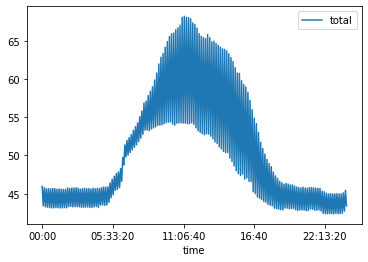

In [42]:
temp = wifi.groupby('time')[['total']].mean().reset_index(drop=False)
temp.plot(x='time', y='total')

<AxesSubplot:xlabel='date_rounded'>

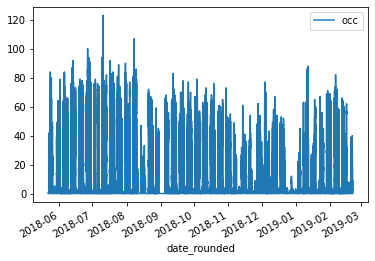

In [43]:
occupancy.plot(x='date_rounded', y='occ')

<AxesSubplot:xlabel='time'>

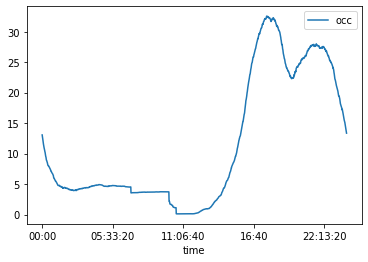

In [44]:
temp = occupancy.groupby('time')[['occ']].mean().reset_index(drop=False)
temp.plot(x='time', y='occ')
